# 1. Importation des bibliothèques nécessaires

In [1]:
# Importation des bibliothèques de base
import pandas as pd
import numpy as np

# Visualisation des données
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


In [2]:
# Chargement du dataset
df = pd.read_csv('donnee-dep-data.gouv-2023-geographie2024-produit-le2024-07-05.csv', sep=';')

# Aperçu rapide du dataset
df.head()

,classe,annee,Code.département,Code.région,unité.de.compte,millPOP,millLOG,faits,POP,LOG,tauxpourmille
0,Homicides,16,01,84,victime,16,16,5,638425,"308491,1600513844","7,83177350511023e-03"
1,Homicides,16,02,32,victime,16,16,10,536136,"264180,0836046834","1,86519838249996e-02"
2,Homicides,16,03,84,victime,16,16,4,339384,"206980,3726684623","1,17860594488839e-02"
3,Homicides,16,04,93,victime,16,16,2,162565,"126760,4042559317","1,23027711992126e-02"
4,Homicides,16,05,93,victime,16,16,0,141107,"134646,6209596995","0,00000000000000e+00"


In [3]:
#3.1 Dimensions du dataset
print(f"Le dataset contient {df.shape[0]} lignes et {df.shape[1]} colonnes.")


Le dataset contient 12928 lignes et 11 colonnes.


In [4]:
# Replace commas with dots
df['tauxpourmille'] = df['tauxpourmille'].str.replace(',', '.')

# Convert to float using astype()
df['tauxpourmille'] = df['tauxpourmille'].astype(float)


In [5]:
# Replace commas with dots
df['LOG'] = df['LOG'].str.replace(',', '.')

# Convert to float using astype()
df['LOG'] = df['LOG'].astype(float)


In [6]:
df['tauxpourmille'].describe()

count    12928.000000
mean         2.688972
std          2.978940
min          0.000000
25%          0.746348
50%          1.791231
75%          3.849314
max         74.694413
Name: tauxpourmille, dtype: float64

In [7]:
#3.2 Informations générales sur les données

# Obtenir des informations sur le type des colonnes, le nombre de valeurs non nulles, etc.
df.info()

# Aperçu statistique des variables numériques
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12928 entries, 0 to 12927
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   classe            12928 non-null  object 
 1   annee             12928 non-null  int64  
 2   Code.département  12928 non-null  object 
 3   Code.région       12928 non-null  int64  
 4   unité.de.compte   12928 non-null  object 
 5   millPOP           12928 non-null  int64  
 6   millLOG           12928 non-null  int64  
 7   faits             12928 non-null  int64  
 8   POP               12928 non-null  int64  
 9   LOG               12928 non-null  float64
 10  tauxpourmille     12928 non-null  float64
dtypes: float64(2), int64(6), object(3)
memory usage: 1.1+ MB


,annee,Code.région,millPOP,millLOG,faits,POP,LOG,tauxpourmille
count,12928.000000,12928.000000,12928.000000,12928.000000,12928.000000,1.292800e+04,1.292800e+04,12928.000000
mean,19.500000,52.653465,19.103960,19.103960,1980.332225,6.658978e+05,3.626437e+05,2.688972
std,2.291376,28.196461,1.835931,1.835931,4497.277245,5.100051e+05,2.598151e+05,2.978940
min,16.000000,1.000000,16.000000,16.000000,0.000000,7.642200e+04,6.039467e+04,0.000000
25%,17.750000,27.000000,17.000000,17.000000,264.000000,2.829485e+05,1.650722e+05,0.746348
50%,19.500000,52.000000,19.000000,19.000000,825.000000,5.303595e+05,2.947771e+05,1.791231
75%,21.250000,76.000000,21.000000,21.000000,2083.250000,8.414820e+05,4.816821e+05,3.849314
max,23.000000,94.000000,21.000000,21.000000,161745.000000,2.611293e+06,1.396753e+06,74.694413


In [8]:
# Nombre de valeurs manquantes par colonne
valeurs_manquantes = df.isnull().sum()
valeurs_manquantes


classe              0
annee               0
Code.département    0
Code.région         0
unité.de.compte     0
millPOP             0
millLOG             0
faits               0
POP                 0
LOG                 0
tauxpourmille       0
dtype: int64

In [9]:
df['unité.de.compte'].value_counts()

victime             4848
infraction          3232
véhicule            2424
Mis en cause        1616
victime entendue     808
Name: unité.de.compte, dtype: int64

In [10]:
df['annee'] = df['annee'] + 2000
df

,classe,annee,Code.département,Code.région,unité.de.compte,millPOP,millLOG,faits,POP,LOG,tauxpourmille
0,Homicides,2016,01,84,victime,16,16,5,638425,308491.160051,0.007832
1,Homicides,2016,02,32,victime,16,16,10,536136,264180.083605,0.018652
2,Homicides,2016,03,84,victime,16,16,4,339384,206980.372668,0.011786
3,Homicides,2016,04,93,victime,16,16,2,162565,126760.404256,0.012303
4,Homicides,2016,05,93,victime,16,16,0,141107,134646.620960,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
12923,Usage de stupéfiants,2023,971,1,Mis en cause,21,21,1920,384315,235967.721619,4.995902
12924,Usage de stupéfiants,2023,972,2,Mis en cause,21,21,1199,360749,218564.892108,3.323641
12925,Usage de stupéfiants,2023,973,3,Mis en cause,21,21,704,286618,98634.271146,2.456231
12926,Usage de stupéfiants,2023,974,4,Mis en cause,21,21,2414,871157,395387.866370,2.771027


<Axes: xlabel='annee', ylabel='tauxpourmille'>

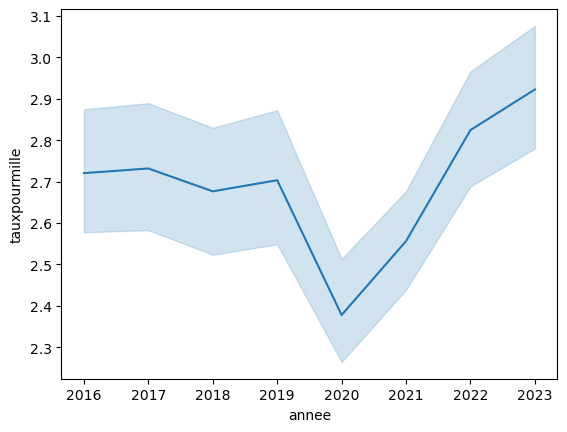

In [11]:
sns.lineplot(data=df, x="annee", y="tauxpourmille")

In [12]:
homicidedf = df[(df['classe'] == 'Homicides')]
homicidedf

,classe,annee,Code.département,Code.région,unité.de.compte,millPOP,millLOG,faits,POP,LOG,tauxpourmille
0,Homicides,2016,01,84,victime,16,16,5,638425,308491.160051,0.007832
1,Homicides,2016,02,32,victime,16,16,10,536136,264180.083605,0.018652
2,Homicides,2016,03,84,victime,16,16,4,339384,206980.372668,0.011786
3,Homicides,2016,04,93,victime,16,16,2,162565,126760.404256,0.012303
4,Homicides,2016,05,93,victime,16,16,0,141107,134646.620960,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
803,Homicides,2023,971,1,victime,21,21,37,384315,235967.721619,0.096275
804,Homicides,2023,972,2,victime,21,21,26,360749,218564.892108,0.072072
805,Homicides,2023,973,3,victime,21,21,58,286618,98634.271146,0.202360
806,Homicides,2023,974,4,victime,21,21,19,871157,395387.866370,0.021810


<Axes: xlabel='tauxpourmille', ylabel='Count'>

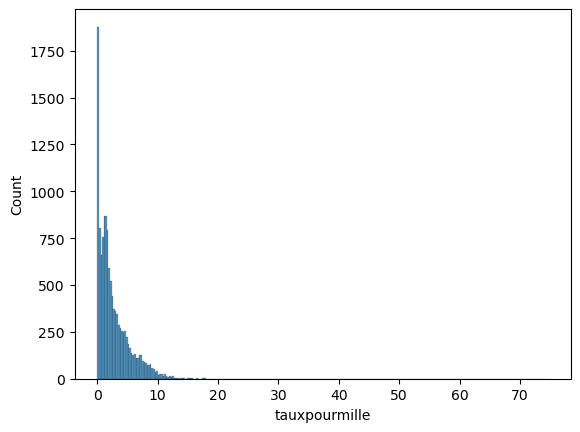

In [13]:
sns.histplot(data=df, x="tauxpourmille")

In [15]:
table = pd.pivot_table(df, values='tauxpourmille', index=['Code.région'], columns=['annee'], aggfunc="mean")
table


annee,2016,2017,2018,2019,2020,2021,2022,2023
Code.région,,,,,,,,
1,3.780190,3.673449,3.431252,3.352644,3.093845,3.276374,3.452440,3.602192
2,3.024466,2.994215,2.778544,2.976055,2.609441,2.767294,2.919226,3.000486
3,4.527393,4.451775,3.902168,3.841895,3.458159,4.133819,3.978450,4.041810
4,2.574662,2.470810,2.330219,2.210172,1.908446,2.043933,2.180702,2.438666
6,2.960824,2.661617,2.267987,2.435619,2.557999,2.622122,2.847631,3.128727
11,4.306840,4.277765,4.193361,4.323122,3.687193,3.912598,4.302520,4.305333
24,2.393792,2.430700,2.388786,2.347659,2.057631,2.309517,2.493650,2.705033
27,2.333817,2.362674,2.352989,2.335500,2.095950,2.183612,2.418387,2.547555
28,2.177412,2.229834,2.219937,2.234748,1.976078,2.140200,2.465937,2.632492


In [16]:
table1 = pd.pivot_table(df, values='tauxpourmille', index=['classe'], columns=['annee'], aggfunc="mean")
table1

annee,2016,2017,2018,2019,2020,2021,2022,2023
classe,,,,,,,,
Autres coups et blessures volontaires,1.669632,1.743422,1.825434,1.831373,1.682741,1.790066,2.001570,2.030893
Cambriolages de logement,6.233482,6.284769,5.681658,5.541889,4.314681,4.308409,4.814819,5.071777
Coups et blessures volontaires,2.989740,3.084545,3.293595,3.522181,3.556671,3.923257,4.490428,4.742809
Coups et blessures volontaires intrafamiliaux,1.320108,1.341123,1.468161,1.690808,1.873930,2.133191,2.488858,2.711916
Destructions et dégradations volontaires,8.514641,8.521706,8.305913,8.230856,7.087336,7.311709,7.506554,7.668256
Escroqueries,3.289721,3.365722,3.430461,3.830238,4.151515,4.821609,5.226377,5.518127
Homicides,0.014428,0.012898,0.012359,0.013282,0.013956,0.013756,0.015312,0.015670
Trafic de stupéfiants,0.545755,0.573975,0.581139,0.589651,0.523295,0.573271,0.595434,0.583916
Usage de stupéfiants,2.465536,2.570302,2.569434,2.421347,2.243853,2.843620,3.095226,3.297352


In [17]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

/var/folders/2y/8y054hxs5y5fp5blczgtp9r80000gn/T/ipykernel_13064/2805906452.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method ='pearson')


,annee,Code.région,millPOP,millLOG,faits,POP,LOG,tauxpourmille
annee,1.000000e+00,1.162392e-15,0.956209,0.956209,0.008141,0.007384,0.021666,0.010906
Code.région,1.162392e-15,1.000000e+00,0.018963,0.018963,-0.087504,-0.188214,-0.086025,-0.050636
millPOP,9.562091e-01,1.896288e-02,1.000000,1.000000,0.006831,0.016794,0.035087,-0.000270
millLOG,9.562091e-01,1.896288e-02,1.000000,1.000000,0.006831,0.016794,0.035087,-0.000270
faits,8.140995e-03,-8.750410e-02,0.006831,0.006831,1.000000,0.478926,0.488994,0.792023
POP,7.384084e-03,-1.882136e-01,0.016794,0.016794,0.478926,1.000000,0.973042,0.205122
LOG,2.166645e-02,-8.602491e-02,0.035087,0.035087,0.488994,0.973042,1.000000,0.214380
tauxpourmille,1.090631e-02,-5.063592e-02,-0.000270,-0.000270,0.792023,0.205122,0.214380,1.000000


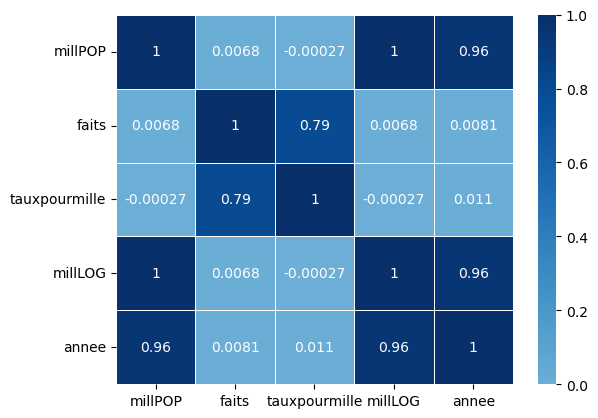

In [18]:
correlation_matrix = df[[ 'millPOP', 'faits', 'tauxpourmille', 'millLOG','annee']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', center=0, linewidths=0.5)

#plt.title("Correlation matrix for Numeric Features")
#plt.xlabel("Movie features")
#plt.ylabel("Movie features")
plt.show()

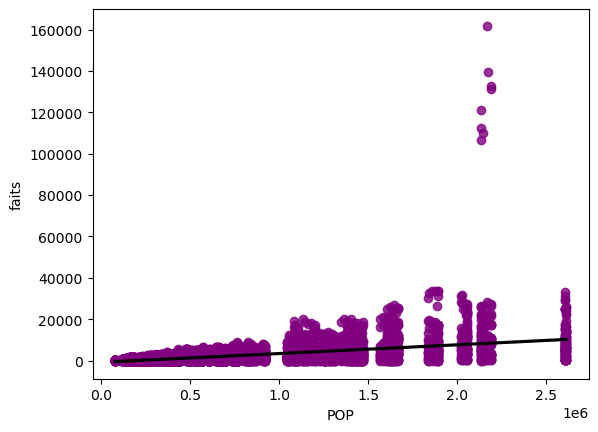

In [19]:
# regplot for a linear regression line

sns.regplot(data=df, x='POP', y='faits', color='purple', line_kws={'color':'black'});

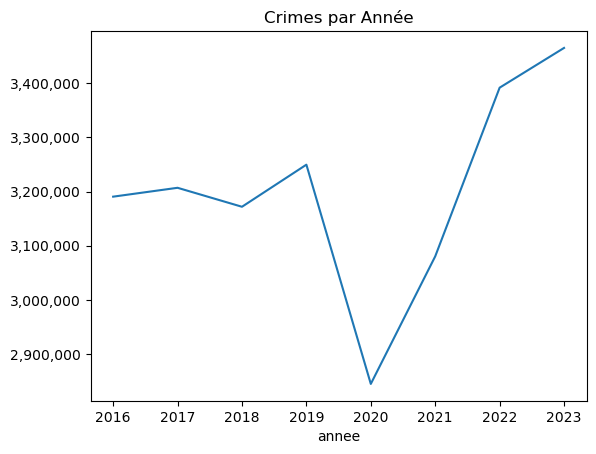

In [20]:
df.groupby('annee')['faits'].sum().plot(kind='line', title='Crimes par Année')
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.show()
plt.show()

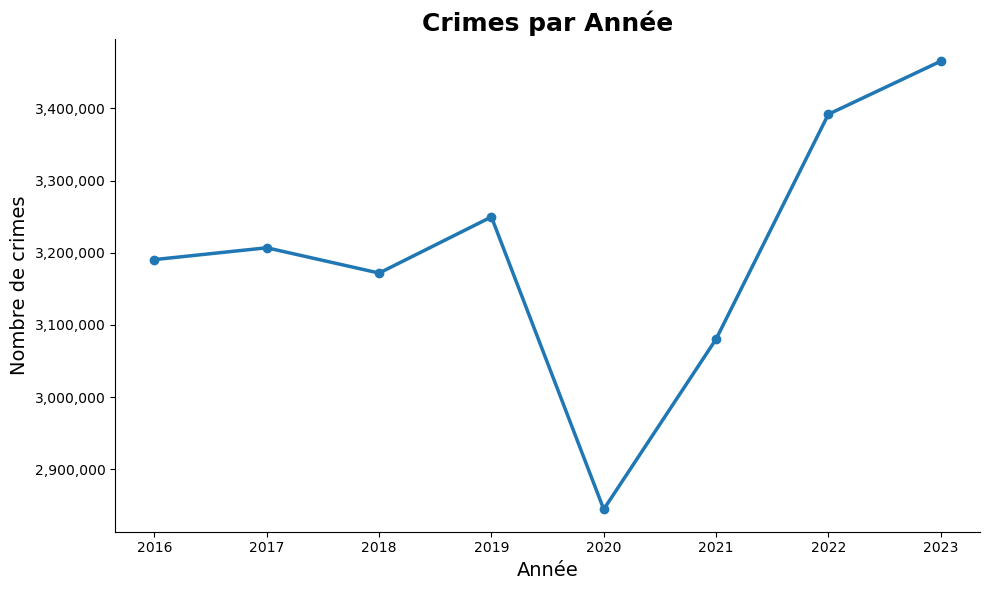

In [21]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Création du graphique
plt.figure(figsize=(10,6))  # Taille de la figure
ax = df.groupby('annee')['faits'].sum().plot(
    kind='line', 
    color='#1f77b4',  # Une nuance de bleu
    linewidth=2.5,  # Épaissir la ligne pour plus de lisibilité
    marker='o',  # Ajouter des points sur les données
    markersize=6,  # Taille des points
    title='Crimes par Année'  # Titre du graphique
)

# Personnalisation des axes
ax.set_xlabel('Année', fontsize=14)  # Taille de police pour l'axe des X
ax.set_ylabel('Nombre de crimes', fontsize=14)  # Taille de police pour l'axe des Y
ax.set_title('Crimes par Année', fontsize=18, fontweight='bold')  # Taille et style du titre

# Formater l'axe Y pour afficher les chiffres avec des virgules
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

# Suppression des lignes de grille
ax.grid(False)

# Personnalisation des bordures
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Sauvegarder le graphique en PDF
plt.tight_layout()  # Ajustement automatique pour éviter les chevauchements
plt.savefig('crimes_par_annee.png', format='png')

# Afficher le graphique
plt.show()


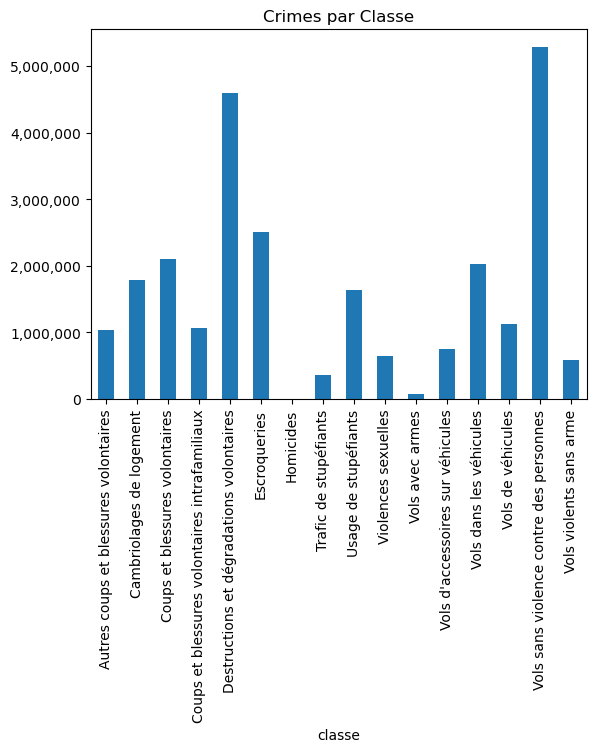

In [22]:
df.groupby('classe')['faits'].sum().plot(kind='bar', title='Crimes par Classe')
# Format the y-axis to display numbers in a more readable way
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.show()

In [23]:
# Chargement du dataset
dfRegion = pd.read_csv('region_2022.csv')

# Aperçu rapide du dataset
dfRegion.head()

,REG,CHEFLIEU,TNCC,NCC,NCCENR,LIBELLE
0,1,97105,3,GUADELOUPE,Guadeloupe,Guadeloupe
1,2,97209,3,MARTINIQUE,Martinique,Martinique
2,3,97302,3,GUYANE,Guyane,Guyane
3,4,97411,0,LA REUNION,La Réunion,La Réunion
4,6,97608,0,MAYOTTE,Mayotte,Mayotte


In [24]:
merged_df = pd.merge(df, dfRegion, left_on='Code.région', right_on='REG')
merged_df

,classe,annee,Code.département,Code.région,unité.de.compte,millPOP,millLOG,faits,POP,LOG,tauxpourmille,REG,CHEFLIEU,TNCC,NCC,NCCENR,LIBELLE
0,Homicides,2016,01,84,victime,16,16,5,638425,308491.160051,0.007832,84,69123,1,AUVERGNE RHONE ALPES,Auvergne-Rhône-Alpes,Auvergne-Rhône-Alpes
1,Homicides,2016,03,84,victime,16,16,4,339384,206980.372668,0.011786,84,69123,1,AUVERGNE RHONE ALPES,Auvergne-Rhône-Alpes,Auvergne-Rhône-Alpes
2,Homicides,2016,07,84,victime,16,16,5,325157,201263.575362,0.015377,84,69123,1,AUVERGNE RHONE ALPES,Auvergne-Rhône-Alpes,Auvergne-Rhône-Alpes
3,Homicides,2016,15,84,victime,16,16,2,145969,101069.567482,0.013702,84,69123,1,AUVERGNE RHONE ALPES,Auvergne-Rhône-Alpes,Auvergne-Rhône-Alpes
4,Homicides,2016,26,84,victime,16,16,6,508006,269062.495146,0.011811,84,69123,1,AUVERGNE RHONE ALPES,Auvergne-Rhône-Alpes,Auvergne-Rhône-Alpes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12923,Usage de stupéfiants,2019,976,6,Mis en cause,17,17,121,256518,73880.000000,0.471702,6,97608,0,MAYOTTE,Mayotte,Mayotte
12924,Usage de stupéfiants,2020,976,6,Mis en cause,17,17,126,256518,73880.000000,0.491194,6,97608,0,MAYOTTE,Mayotte,Mayotte
12925,Usage de stupéfiants,2021,976,6,Mis en cause,17,17,150,256518,73880.000000,0.584754,6,97608,0,MAYOTTE,Mayotte,Mayotte
12926,Usage de stupéfiants,2022,976,6,Mis en cause,17,17,151,256518,73880.000000,0.588653,6,97608,0,MAYOTTE,Mayotte,Mayotte


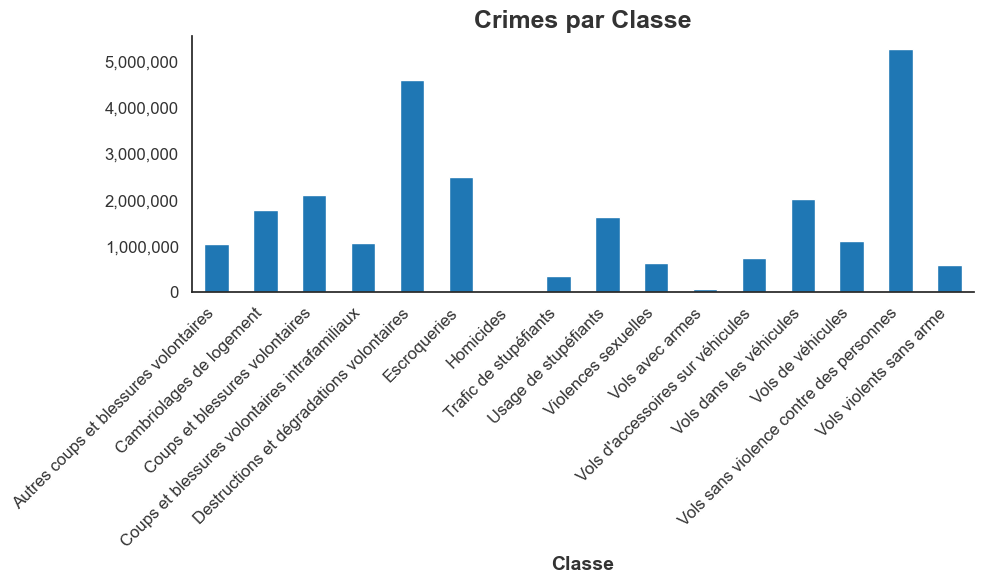

In [25]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Désactiver les gridlines et définir un fond blanc
sns.set(style="white")  # Style sans grille et fond blanc

# Créer la figure avec des dimensions adaptées
plt.figure(figsize=(10, 6))

# Générer le graphique à barres avec une seule couleur
merged_df.groupby('classe')['faits'].sum().plot(kind='bar', color='#1f77b4')  # Bleu sobre

# Ajouter un titre avec un style amélioré
plt.title('Crimes par Classe', fontsize=18, fontweight='bold', color='#333333')

# Ajouter des labels aux axes avec un style professionnel
plt.xlabel('Classe', fontsize=14, fontweight='bold', color='#333333')
#plt.ylabel('Nombre de Crimes', fontsize=14, fontweight='bold', color='#333333')

# Formater l'axe des y pour afficher des nombres plus lisibles
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

# Rotation des étiquettes de l'axe des x pour éviter le chevauchement
plt.xticks(rotation=45, ha='right', fontsize=12, color='#333333')

# Ajuster la taille des étiquettes de l'axe y
plt.yticks(fontsize=12, color='#333333')

# Supprimer les bordures inutiles pour un style épuré
sns.despine()

# Supprimer les gridlines (pas de ligne de grille)
plt.grid(False)

# Optimiser les marges pour que tout soit bien visible
plt.tight_layout()

# Afficher le graphique
plt.savefig('classe.png', format='png')

plt.show()


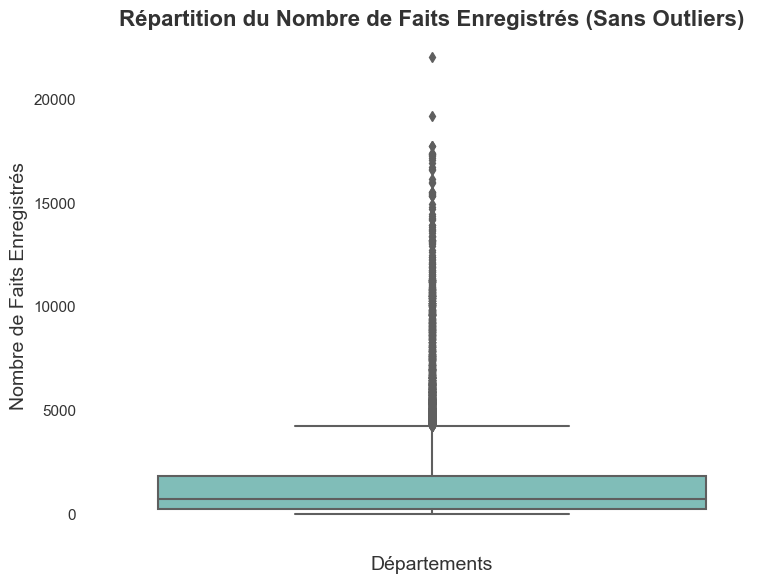

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul de l'IQR (Interquartile Range)
Q1 = df['tauxpourmille'].quantile(0.25)
Q3 = df['tauxpourmille'].quantile(0.75)
IQR = Q3 - Q1

# Définir les bornes pour les outliers (valeurs aberrantes)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les outliers
filtered_df = df[(df['tauxpourmille'] >= lower_bound) & (df['tauxpourmille'] <= upper_bound)]

# Définir le style global pour un aspect plus professionnel
sns.set(style="white", palette="pastel")

# Créer la figure avec des dimensions adaptées pour plus de lisibilité
plt.figure(figsize=(8, 6))

# Création du boxplot avec une palette bleu-vert
sns.boxplot(y=filtered_df['faits'], color='#76c7c0')  # Bleu-vert doux et esthétique

# Ajouter un titre et personnaliser les labels avec une police améliorée
plt.title('Répartition du Nombre de Faits Enregistrés (Sans Outliers)', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Départements', fontsize=14, color='#333333')
plt.ylabel('Nombre de Faits Enregistrés', fontsize=14, color='#333333')

# Ajuster la couleur des ticks (graduations des axes) pour qu'ils soient cohérents avec le design global
plt.xticks(color='#333333')
plt.yticks(color='#333333')

# Supprimer les bordures non nécessaires pour un look épuré
sns.despine(left=True, bottom=True)

# Optimiser la mise en page pour éviter les chevauchements
plt.tight_layout()

# Afficher le graphique
plt.show()


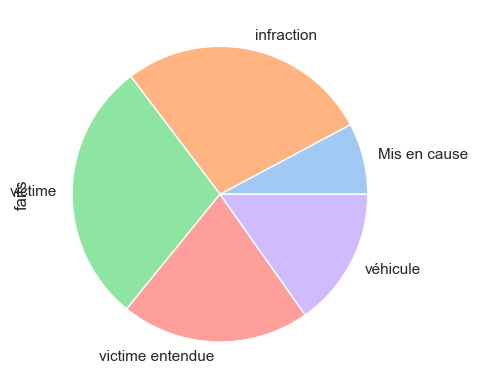

In [27]:
df.groupby('unité.de.compte')['faits'].sum().plot(kind='pie')

# Show the plot
plt.show()
plt.show()

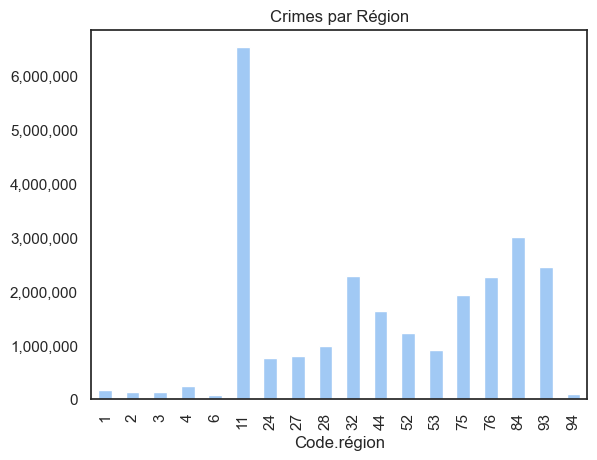

In [28]:
df.groupby('Code.région')['faits'].sum().plot(kind='bar', title='Crimes par Région')
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.show()
plt.show()

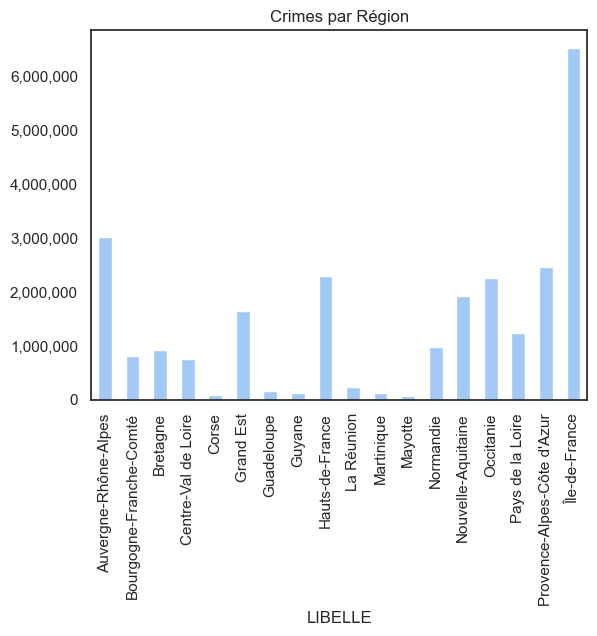

In [29]:
merged_df.groupby('LIBELLE')['faits'].sum().plot(kind='bar', title='Crimes par Région')
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.show()
plt.show()

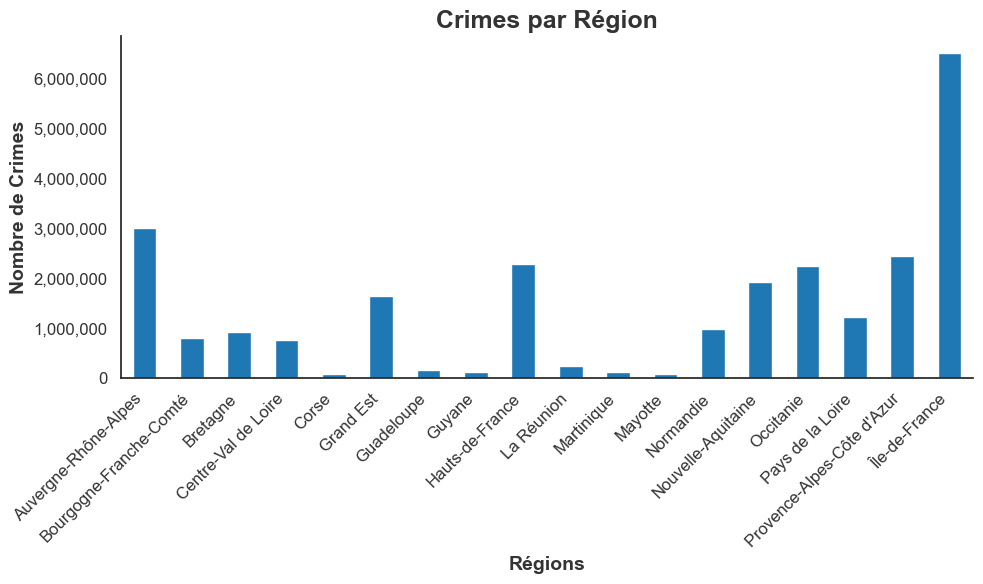

In [30]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Désactiver les gridlines et définir un fond blanc
sns.set(style="white")  # Style sans grille et fond blanc

# Créer la figure avec des dimensions adaptées
plt.figure(figsize=(10, 6))

# Générer le graphique à barres avec une seule couleur
merged_df.groupby('LIBELLE')['faits'].sum().plot(kind='bar', color='#1f77b4')  # Bleu sobre

# Ajouter un titre avec un style amélioré
plt.title('Crimes par Région', fontsize=18, fontweight='bold', color='#333333')

# Ajouter des labels aux axes avec un style professionnel
plt.xlabel('Régions', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Nombre de Crimes', fontsize=14, fontweight='bold', color='#333333')

# Formater l'axe des y pour afficher des nombres plus lisibles
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

# Rotation des étiquettes de l'axe des x pour éviter le chevauchement
plt.xticks(rotation=45, ha='right', fontsize=12, color='#333333')

# Ajuster la taille des étiquettes de l'axe y
plt.yticks(fontsize=12, color='#333333')

# Supprimer les bordures inutiles pour un style épuré
sns.despine()

# Supprimer les gridlines (pas de ligne de grille)
plt.grid(False)

# Optimiser les marges pour que tout soit bien visible
plt.tight_layout()

# Afficher le graphique
plt.savefig('region.png', format='png')

plt.show()


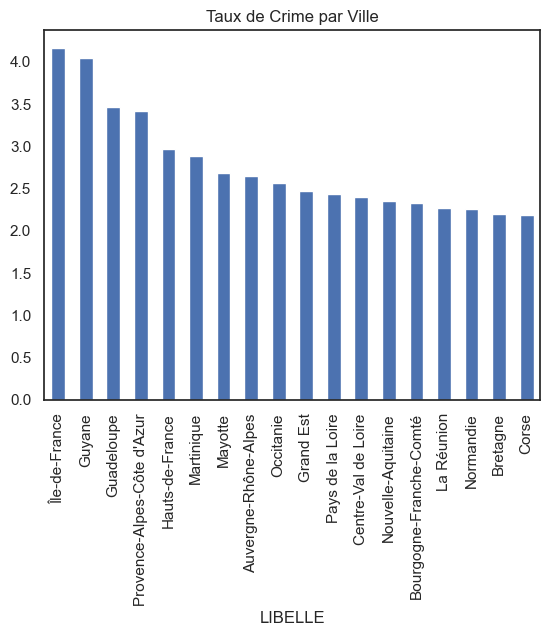

In [31]:
# Visualiser le taux de crime par ville

merged_df.groupby('LIBELLE')['tauxpourmille'].mean().sort_values(ascending=False).plot(kind='bar', title='Taux de Crime par Ville')
plt.show()

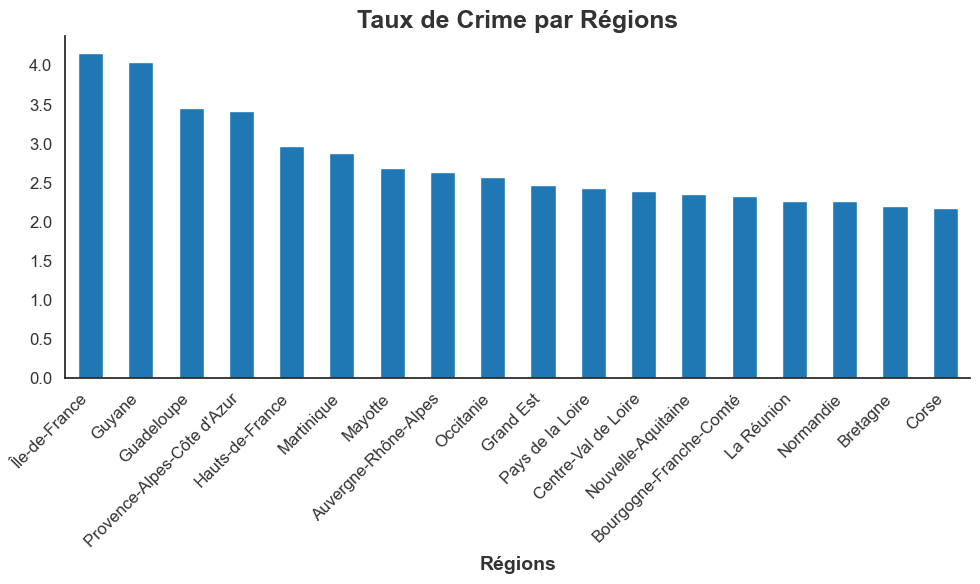

In [32]:
#sns.countplot(x='Code.région', hue='classe', data=df)
import matplotlib.pyplot as plt
import seaborn as sns

# Désactiver les gridlines et définir un fond blanc
sns.set(style="white")  # Fond blanc sans gridlines

# Créer la figure avec des dimensions adaptées
plt.figure(figsize=(10, 6))

# Générer le graphique à barres avec une seule couleur
merged_df.groupby('LIBELLE')['tauxpourmille'].mean().sort_values(ascending=False).plot(kind='bar', color='#1f77b4')  # Bleu sobre

# Ajouter un titre avec un style amélioré
plt.title('Taux de Crime par Régions', fontsize=18, fontweight='bold', color='#333333')

# Ajouter des labels aux axes avec un style professionnel
plt.xlabel('Régions', fontsize=14, fontweight='bold', color='#333333')
#plt.ylabel('Taux de Crimes pour 1 000 habitants', fontsize=14, fontweight='bold', color='#333333')

# Rotation des étiquettes de l'axe des x pour éviter le chevauchement
plt.xticks(rotation=45, ha='right', fontsize=12, color='#333333')

# Ajuster la taille des étiquettes de l'axe y
plt.yticks(fontsize=12, color='#333333')

# Supprimer les bordures inutiles pour un style épuré
sns.despine()

# Supprimer les gridlines (pas de lignes de grille)
plt.grid(False)

# Optimiser les marges pour que tout soit bien visible
plt.tight_layout()

# Afficher le graphique
plt.savefig('Tregion.png', format='png')

plt.show()


In [33]:
statistiques_numeriques = df[['millPOP', 'millLOG', 'faits', 'POP', 'LOG', 'tauxpourmille']].describe()
statistiques_numeriques['POP'] = statistiques_numeriques['POP'].astype(int)

statistiques_numeriques

,millPOP,millLOG,faits,POP,LOG,tauxpourmille
count,12928.000000,12928.000000,12928.000000,12928,1.292800e+04,12928.000000
mean,19.103960,19.103960,1980.332225,665897,3.626437e+05,2.688972
std,1.835931,1.835931,4497.277245,510005,2.598151e+05,2.978940
min,16.000000,16.000000,0.000000,76422,6.039467e+04,0.000000
25%,17.000000,17.000000,264.000000,282948,1.650722e+05,0.746348
50%,19.000000,19.000000,825.000000,530359,2.947771e+05,1.791231
75%,21.000000,21.000000,2083.250000,841482,4.816821e+05,3.849314
max,21.000000,21.000000,161745.000000,2611293,1.396753e+06,74.694413


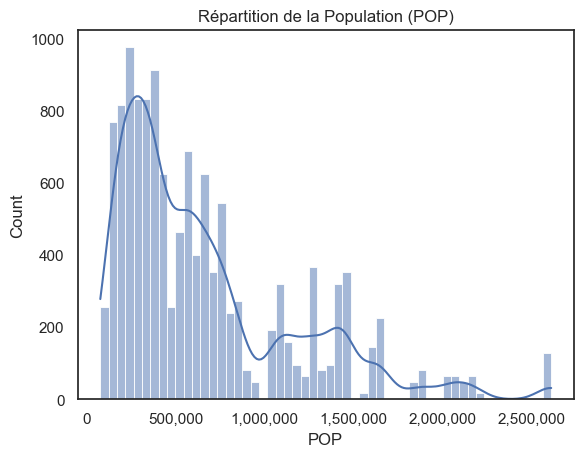

In [34]:
sns.histplot(data=df, x="POP", kde=True)
# Format the y-axis to display numbers in a more readable way
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('Répartition de la Population (POP)')


plt.savefig('gg.pdf', format='pdf')
# Show the plot
plt.show()

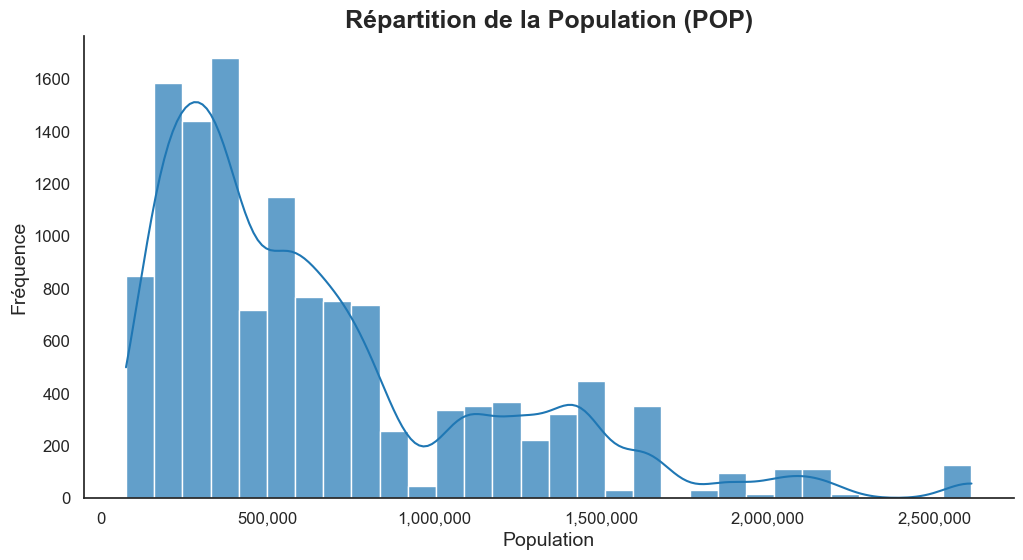

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Sample data (replace this with your actual DataFrame)
# df = ...

# Set the style and context of the plot
#sns.set_style("whitegrid")
#sns.set_context("talk")

# Create the histogram with KDE
plt.figure(figsize=(12, 6))  # Set the figure size
sns.histplot(data=df, x="POP", kde=True, color='#1f77b4', bins=30, alpha=0.7)

# Format the y-axis to display numbers in a more readable way
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().xaxis.set_major_formatter(formatter)

# Add title and labels
plt.title('Répartition de la Population (POP)', fontsize=18, weight='bold')
plt.xlabel('Population', fontsize=14)
plt.ylabel('Fréquence', fontsize=14)

# Optional: Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(False)

sns.despine()


# Save the plot as a PDF file
plt.savefig('gg.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()


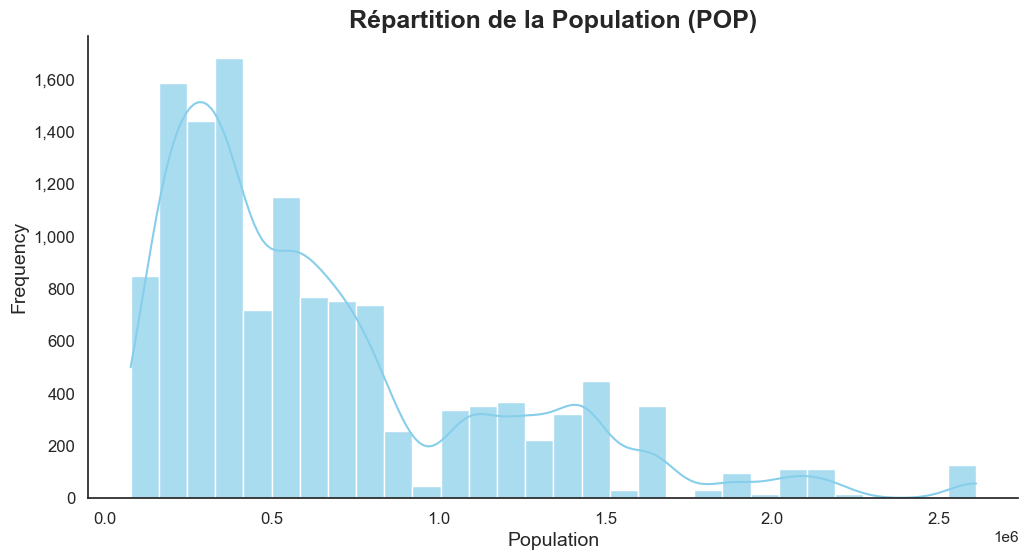

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Sample data (replace this with your actual DataFrame)
# df = ...

# Set the style and context of the plot
#sns.set_style("white")  # Use a plain white background
#sns.set_context("talk")  # Set context for larger font sizes

# Create the histogram with KDE
plt.figure(figsize=(12, 6))  # Set the figure size
sns.histplot(data=df, x="POP", kde=True, color='skyblue', bins=30, alpha=0.7)

# Format the y-axis to display numbers in a more readable way
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

# Add title and labels
plt.title('Répartition de la Population (POP)', fontsize=18, weight='bold')
plt.xlabel('Population', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove gridlines
plt.grid(False)

sns.despine()


# Save the plot as a PDF file

# Show the plot
plt.show()


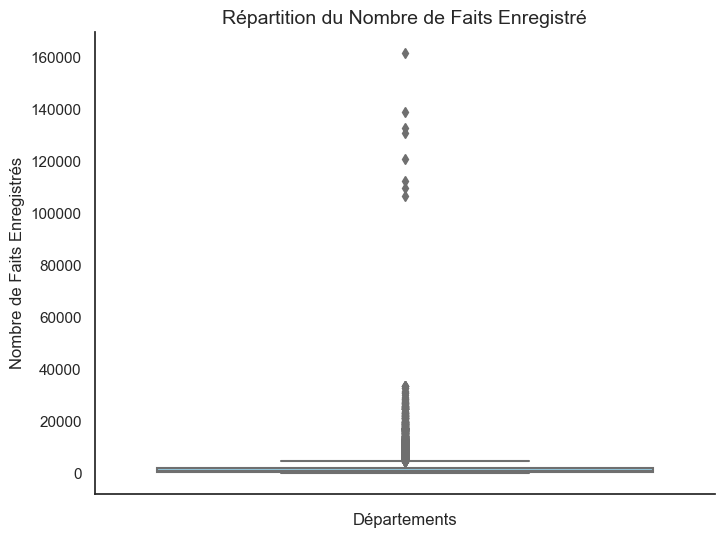

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['faits'], color="skyblue")

sns.despine()


# Ajouter un titre et des labels pour plus de clarté
plt.title('Répartition du Nombre de Faits Enregistré', fontsize=14)
plt.xlabel('Départements')
plt.ylabel('Nombre de Faits Enregistrés')
plt.savefig('box.png', format='png')


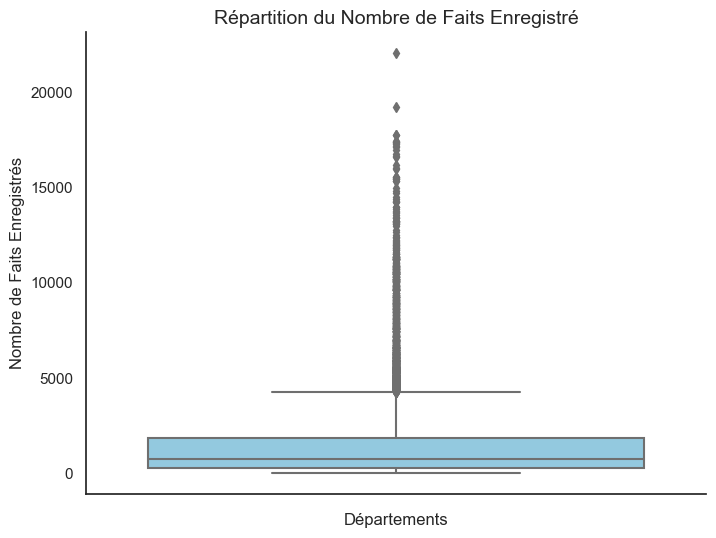

In [38]:
# Compute the IQR
Q1 = df['tauxpourmille'].quantile(0.25)
Q3 = df['tauxpourmille'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_df = df[(df['tauxpourmille'] >= lower_bound) & (df['tauxpourmille'] <= upper_bound)]

plt.figure(figsize=(8, 6))
sns.boxplot(y=filtered_df['faits'], color="skyblue")

sns.despine()


# Ajouter un titre et des labels pour plus de clarté
plt.title('Répartition du Nombre de Faits Enregistré', fontsize=14)
plt.xlabel('Départements')
plt.ylabel('Nombre de Faits Enregistrés')
plt.savefig('boxx.png', format='png')



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


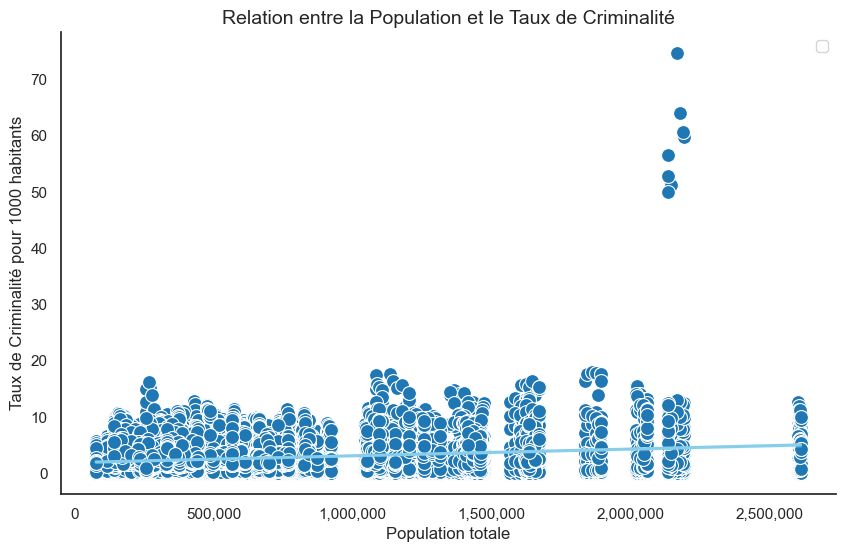

In [39]:
# Créer un nuage de points pour la relation entre la population et le taux de criminalité
plt.figure(figsize=(10, 6))
sns.scatterplot(x='POP', y='tauxpourmille', data=df, color="#1f77b4", s=100)

# Ajouter une ligne de régression pour observer la tendance
sns.regplot(x='POP', y='tauxpourmille', data=df, scatter=False, color="skyblue", line_kws={"label":"Tendance"})

formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().xaxis.set_major_formatter(formatter)

# Ajouter un titre et des labels pour plus de clarté
plt.title('Relation entre la Population et le Taux de Criminalité', fontsize=14)
plt.xlabel('Population totale', fontsize=12)
plt.ylabel('Taux de Criminalité pour 1000 habitants', fontsize=12)

# Afficher la légende
plt.legend()
sns.despine()


# Afficher le graphique
plt.savefig('rel.png', format='png')
plt.show()

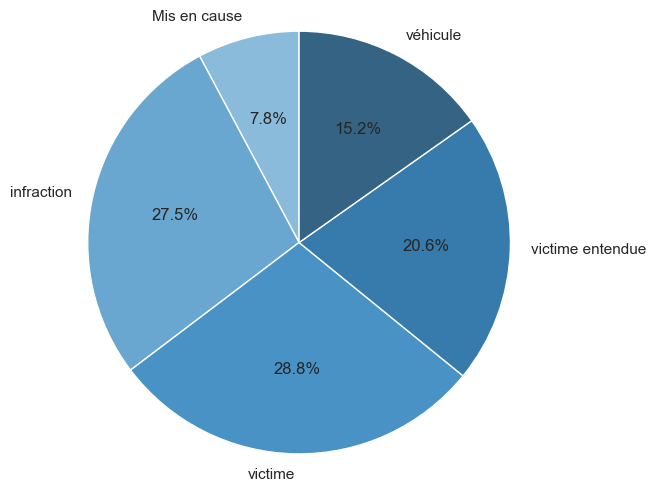

In [40]:
# Calculer la fréquence des catégories
frequences=df.groupby('unité.de.compte')['faits'].sum()

# Créer le diagramme circulaire
plt.figure(figsize=(6, 6))
plt.pie(frequences, labels=frequences.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Blues_d'))
#plt.title('Distribution des Unités de Compte', fontsize=14)
plt.axis('equal')  # Pour un cercle parfait
plt.savefig('circle.png', format='png')

plt.show()

# Test Statistiques

## 1. Analyse de corrélation entre les variables clés

Afin de comprendre la relation entre les variables d'intérêt, nous avons établi une matrice de corrélation pour évaluer l'intensité de la relation linéaire entre le nombre de faits enregistrés, la population totale, et le taux pour mille.

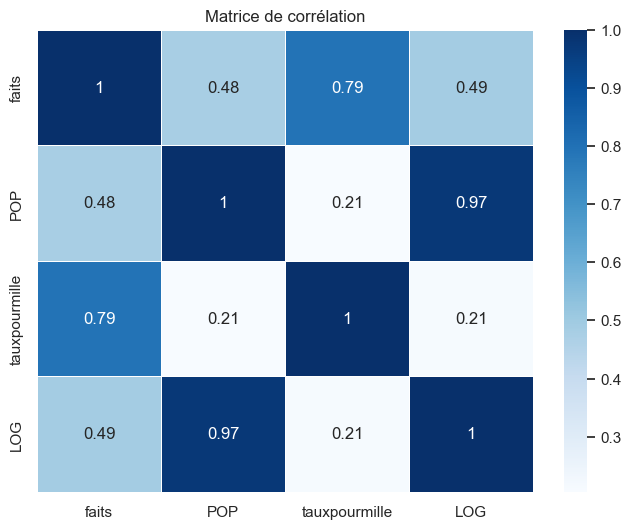

In [41]:
# Calcul de la matrice de corrélation
corr_matrix = df[['faits', 'POP', 'tauxpourmille','LOG']].corr()


# Affichage sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Matrice de corrélation')
plt.savefig('max.png', format='png')

plt.show()


L'analyse des corrélations entre le nombre de faits enregistrés (faits),la population totale (POP), et le taux par millier de faits enregistrés (tauxpourmille), nous a permis de mettre en lumière certaines relations linéaire.

Tout d'abord nous avons vu qu’il existe une corrélation modérée positive entre le nombre de faits enregistrés et la population totale (r = 0.48),  ce coefficient indique que la taille de la population a un effet limité sur le volume des crimes et qu’il y a une relation linéaire partielle et relativement faible entre les deux variables.

En revanche, nous avons constaté une forte corrélation positive entre le taux par millier et le nombre de faits enregistrés (r = 0.79). Cette corrélation élevée indique que le taux de criminalité varie de manière proportionnelle avec le nombre total de faits, et  confirme que le taux pour mille est un bon indicateur de la concentration de la criminalité.

Enfin, la corrélation faible entre le taux pour mille et la population (r = 0.21) suggère que la taille de la population n'influence pas directement le taux de criminalité. Autrement dit, une population plus grande n’entraîne pas automatiquement une hausse du taux de criminalité.

## 2- Test de Corrélation

Pour évaluer la significativité de la relation entre les variables utiliséss précédemment,nous avons effectué un test de corrélation de Pearson. Ce test a permis de mesurer la corrélation entre trois paires de variables : le nombre de faits enregistrés et la population, le nombre de faits enregistrés et le taux par millier, ainsi que la population et le taux par millier.


In [42]:
#test de corrélation de Pearson :

from scipy.stats import pearsonr

# Corrélation entre population et nombre de faits
corr, p_value111 = pearsonr(df['POP'], df['faits'])
print(f"Corrélation de Pearson : {corr}, p-value : {p_value111:.9f}")



Corrélation de Pearson : 0.4789264938363239, p-value : 0.000000000


In [43]:
#test de corrélation de Pearson :

from scipy.stats import pearsonr

# Corrélation entre population et nombre de faits
corr, p_value2 = pearsonr(df['tauxpourmille'], df['faits'])
print(f"Corrélation de Pearson : {corr}, p-value : {p_value2:.9f}")

Corrélation de Pearson : 0.7920232694489593, p-value : 0.000000000


In [44]:
from scipy.stats import pearsonr

# Corrélation entre population et nombre de faits
corr, p_value3 = pearsonr(df['tauxpourmille'], df['POP'])
print(f"Corrélation de Pearson : {corr:.9f}, p-value : {p_value3:.9f}")



Corrélation de Pearson : 0.205122184, p-value : 0.000000000


Les résultats du test de corrélation de Pearson montrent que toutes les p-values sont extrêmement faibles, proches de 0. Cela indique que les coefficients de corrélation analysés précédemment (0.79 entre le nombre de faits enregistrés et le taux pour mille, 0.21 entre le taux pour mille et la population, et 0.48 entre le nombre de faits et la population) sont très significatifs. Ainsi, ces relations ne sont pas dues au hasard et peuvent être considérées comme robustes dans l'analyse des crimes et délits.

## 3-  Test de Normalité (Shapiro-Wilk)

Avant d’appliquer des tests paramétriques comme le test t et l’ANOVA, nous devons vérifier si nos données sont normalement distribuées. Nous avons utilisé le test de Shapiro-Wilk sur les variables faits et tauxpourmille.

In [45]:
# Test de normalité sur le tauxpourmille

from scipy.stats import shapiro
stat, p_val1 = shapiro(df['tauxpourmille'])
print(f"Shapiro-Wilk test stat : {stat}, p-value : {p_val1:.9f}")


Shapiro-Wilk test stat : 0.7213279008865356, p-value : 0.000000000


/Users/cherubindelino/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [46]:
# Test de normalité sur le tauxpourmille

from scipy.stats import shapiro
stat, p_val2 = shapiro(df['faits'])
print(f"Shapiro-Wilk test stat : {stat}, p-value : {p_val2:.19f}")


Shapiro-Wilk test stat : 0.3525233864784241, p-value : 0.0000000000000000000


Pour les deux variables, les p-values sont extrêmement faibles, bien en dessous du seuil de signification de 0.05. Cela signifie que nous rejetons l'hypothèse nulle selon laquelle ces variables suivent une distribution normale. Les statistiques de Shapiro-Wilk respectivement 0.721 et 0.352 sont largement inférieures à 1, et sont en dehors de la plage typique des valeurs attendues pour une distribution normale, ce qui renforce cette conclusion. 

Donc, il n'est pas approprié d'utiliser des tests paramétriques comme le t-test ou l'ANOVA, étant donné que les deux variables ne suivent pas une distribution normale. Ces tests supposent que les données suivent une distribution normale, et dans nos cas d'étude, les utiliser pourrait conduire à des résultats erronés ou à des conclusions biaisées.

## 4- Test de Mann-Whitney U

Comme nous l'avons vu précédemment les données des variables faits et tauxpourmille ne suivent pas une distribution normale, nous avons donc opté pour le test de Mann-Whitney U, qui est un test non paramétrique adapté à la comparaison de deux groupes indépendants. Ce test nous permettra d'évaluer s'il existe des différences significatives dans le le taux par millier de faits enregistrés entre différentes années.

In [47]:
from scipy.stats import mannwhitneyu

# Comparer deux périodes : 2016-2019 vs 2020-2023
groupe1 = df[(df['annee'] >= 2016) & (df['annee'] <= 2019)]['tauxpourmille']
groupe2 = df[(df['annee'] >= 2020) & (df['annee'] <= 2023)]['tauxpourmille']

statme, p_valueMU = mannwhitneyu(groupe1, groupe2)

print(f"Statistique U de Mann-Whitney: {stat}")
print(f"P-value: {p_valueMU}")

Statistique U de Mann-Whitney: 0.3525233864784241
P-value: 0.01863824136480354


Pour réaliser le test de Mann-Whitney, nous avons décidé de grouper notre base de données en deux périodes distinctes : 2016-2019 et 2020-2023. Les résultats révèlent une différence statistiquement significative entre les taux de criminalité observés avant et après 2020. La p-value étant inférieure au seuil de signification classique de 0.05, nous rejetons l’hypothèse nulle, qui postulait qu’il n’y avait pas de différence significative entre les deux périodes. Cela indique que les taux de criminalité ont significativement évolué entre 2016-2019 et 2020-2023. Plusieurs facteurs contextuels peuvent expliquer cette évolution, tels que les répercussions de la crise sanitaire mondiale (COVID-19) ou encore les modifications des politiques publiques.

Le graphique ci-après nous montre cette évolution au fils des années. 



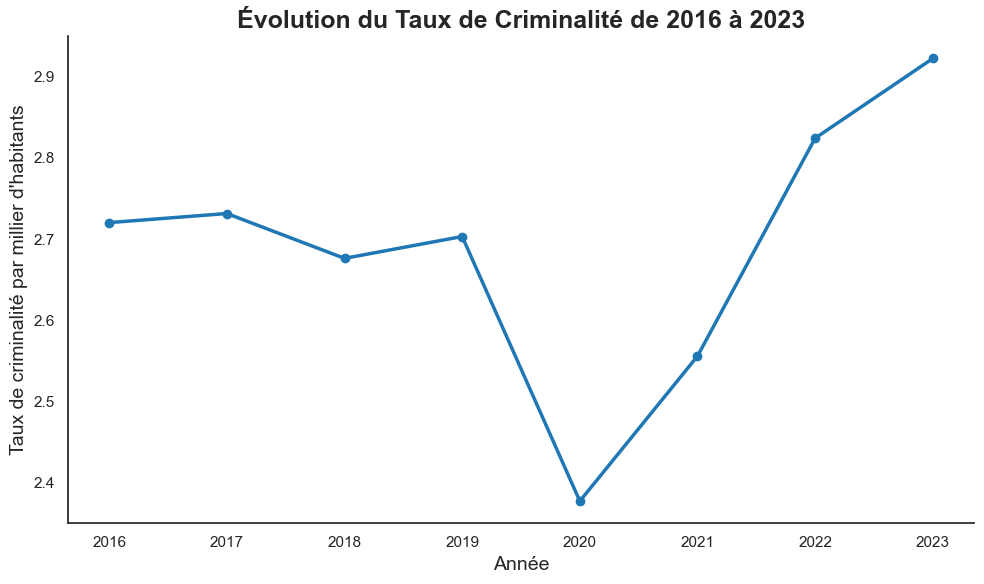

In [48]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Création du graphique
plt.figure(figsize=(10,6))  # Taille de la figure
ax = df.groupby('annee')['tauxpourmille'].mean().plot(
    kind='line', 
    color='#1f77b4',  # Une nuance de bleu
    linewidth=2.5,  # Épaissir la ligne pour plus de lisibilité
    marker='o',  # Ajouter des points sur les données
    markersize=6,  # Taille des points
    title='Crimes par Année'  # Titre du graphique
)

# Personnalisation des axes
ax.set_xlabel('Année', fontsize=14)  # Taille de police pour l'axe des X
ax.set_ylabel("Taux de criminalité par millier d'habitants", fontsize=14)  # Taille de police pour l'axe des Y
ax.set_title('Évolution du Taux de Criminalité de 2016 à 2023', fontsize=18, fontweight='bold')  # Taille et style du titre

# Formater l'axe Y pour afficher les chiffres avec des virgules
#formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
#ax.yaxis.set_major_formatter(formatter)

# Suppression des lignes de grille
ax.grid(False)

# Personnalisation des bordures
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Sauvegarder le graphique en PDF
plt.tight_layout()  # Ajustement automatique pour éviter les chevauchements
plt.savefig('crimes_par_annee.png', format='png')

# Afficher le graphique
plt.show()


## 5- test de Kruskal-Wallis

Le test de Kruskal-Wallis est une alternative non paramétrique à l'ANOVA pour comparer les médianes de plusieurs groupes. C'est l'équivalent du test de Mann-Whitney U, mais pour plus de deux groupes. Nous l'avons utilisé pour comparer les taux de criminalité entre les différentes régions sur la période de 2016 à 2023.

In [52]:
# Séparer les données par région sur cette période
region1 = df[df['Code.région'] == 76]['tauxpourmille']
region2 = df[df['Code.région'] == 84]['tauxpourmille']
region3 = df[df['Code.région'] == 75]['tauxpourmille']
region4 = df[df['Code.région'] == 44]['tauxpourmille']
region5 = df[df['Code.région'] == 27]['tauxpourmille']
region6 = df[df['Code.région'] == 11]['tauxpourmille']
region7 = df[df['Code.région'] == 93]['tauxpourmille']
region8 = df[df['Code.région'] == 24]['tauxpourmille']
region9 = df[df['Code.région'] == 52]['tauxpourmille']
region10 = df[df['Code.région'] == 28]['tauxpourmille']
region11= df[df['Code.région'] == 32]['tauxpourmille']
region12 = df[df['Code.région'] == 53]['tauxpourmille']
region13 = df[df['Code.région'] == 94]['tauxpourmille']
region14 = df[df['Code.région'] == 1]['tauxpourmille']
region15 = df[df['Code.région'] == 2]['tauxpourmille']
region16= df[df['Code.région'] == 3]['tauxpourmille']
region17 = df[df['Code.région'] == 4]['tauxpourmille']
region18 = df[df['Code.région'] == 6]['tauxpourmille']


# Effectuer le test de Kruskal-Wallis sur plusieurs années
statk, p_valuek = kruskal(region1, region2, region3, region4, region5,region6,region7,region8,region9,region10,region11,region12,region13,region14,region15,region16,region17,region18)


print(f"Statistique H de Kruskal-Wallis: {statk}, p-value: {p_valuek:.9f}")

Statistique H de Kruskal-Wallis: 293.80280206866536, p-value: 0.000000000


Les résultats du test de Kruskal-Wallis montrent qu'il y a une différence statistiquement significative entre les taux de criminalité des différentes régions de France pour la période 2016-2023. La p-value est extrêmement petite (inférieure à 0.05, et même proche de zéro), ce qui signifie que la probabilité que les différences observées soient dues au hasard est très faible. Cela nous permet de rejeter l'hypothèse nulle, qui stipulait que les taux de criminalité dans toutes les régions sont statistiquement identiques.

In [ ]:
df.groupby('annee')['tauxpourmille'].mean()

In [51]:
#Test du Chi²

from scipy.stats import chi2_contingency

# Créer une table de contingence (exemple pour des départements et des faits)
contingency_table = pd.crosstab(df['Code.département'], df['faits'])

# Effectuer le test du Chi²
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)

print(f"Chi² statistic: {chi2_stat}, p-value: {p_val:.9f}")


Chi² statistic: 451337.4190297855, p-value: 0.000000857


In [50]:
import pandas as pd
from scipy.stats import kruskal

df_2016 = df[df['annee'] == 2016]['tauxpourmille']
df_2017 = df[df['annee'] == 2017]['tauxpourmille']
df_2018 = df[df['annee'] == 2018]['tauxpourmille']
df_2019 = df[df['annee'] == 2019]['tauxpourmille']
df_2020 = df[df['annee'] == 2020]['tauxpourmille']
df_2021 = df[df['annee'] == 2021]['tauxpourmille']
df_2022 = df[df['annee'] == 2022]['tauxpourmille']
df_2023 = df[df['annee'] == 2023]['tauxpourmille']

# Effectuer le test de Kruskal-Wallis
stat, p_value88 = kruskal(df_2016, df_2017, df_2018, df_2019, df_2020,df_2021,df_2022,df_2023 )

# Affichage des résultats

print(f"Statistique H : {stat}, p-value: {p_value88:.9f}")
#print("Statistique H :", stat)
#print("Valeur p :", p_value5)


Statistique H : 45.2286749087855, p-value: 0.000000123


In [ ]:
import pandas as pd
import scikit_posthocs as sp

# Effectuer le test de Dunn avec correction de Bonferroni
posthoc = sp.posthoc_dunn(df, val_col='tauxpourmille', group_col='annee')

# Afficher les résultats des tests post-hoc
posthoc_rounded = posthoc.round(4)

def highlight_significant(val):
    color = 'background-color: green' if val < 0.05 else ''
    return color

# Appliquer le style conditionnel
posthoc_styled = posthoc_rounded.style.applymap(highlight_significant)

# Afficher le DataFrame avec le format conditionnel
posthoc_styled

## 6. Test du Chi²

Le test du Chi² permet de tester une relation entre deux variables qualitatives (catégorielles). Nous l'avons utilisé pour tester l’association entre le type de crime/délit (classe) et le type d’unité comptabilisée (unité.de.compte), afin de voir si certains types de crimes sont systématiquement associés à des unités de compte spécifiques. 

In [53]:
#Test du Chi²

from scipy.stats import chi2_contingency

# Créer une table de contingence (exemple pour des départements et des faits)
contingency_table = pd.crosstab(df['classe'], df['unité.de.compte'])

# Effectuer le test du Chi²
chi2_stat, p_valr, dof, ex = chi2_contingency(contingency_table)

print(f"Chi² statistic: {chi2_stat}, p-value: {p_valr:.9f}, Degrés de liberté: {dof}")

Chi² statistic: 51711.99999999999, p-value: 0.000000000, Degrés de liberté: 60


Les résultats du test du Chi² révèlent une association très significative entre le type de crime/délit et l'unité de compte, avec une statistique Chi² élevée de 51711.99 et une p-value extrêmement faible de 0.000000000. Cela indique que les différences observées entre les types de crimes et les types d'unités comptabilisées ne sont pas dues au hasard. Autrement dit, certains types de crimes semblent être systématiquement associés à des unités de compte spécifiques, ce qui suggère une distribution non aléatoire des infractions selon ces catégories.

Ces résultats signifient qu'il existe des tendances distinctes dans la manière dont les crimes sont comptabilisés en fonction de leur nature. Par exemple, certains crimes violents pourraient être davantage associés à des unités basées sur les victimes, tandis que d'autres délits, comme les vols ou les cambriolages, pourraient être comptabilisés différemment (par infractions ou par Mise en cause).


## 7. Régression Linéaire

Pour évaluer les facteurs susceptibles d'influencer le nombre de faits criminels enregistrés, nous avons réalisé une régression linéaire multiple en utilisant le nombre de logements (LOG) et la population totale (POP) comme variables explicatives, avec le nombre de faits enregistrés (faits) comme variable dépendante. 

In [58]:

# Variables indépendantes : population et logements
X = df[['POP', 'LOG']]

# Variable dépendante : taux de criminalité
y = df['faits']

# Ajouter une constante (intercept) à X
X = sm.add_constant(X)

# Créer et ajuster le modèle de régression multiple
model = sm.OLS(y, X).fit()

# Afficher le résumé des résultats
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  faits   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     2033.
Date:                Fri, 25 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:37:07   Log-Likelihood:            -1.2532e+05
No. Observations:               12928   AIC:                         2.506e+05
Df Residuals:                   12925   BIC:                         2.507e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1075.3538     59.758    -17.995      0.0

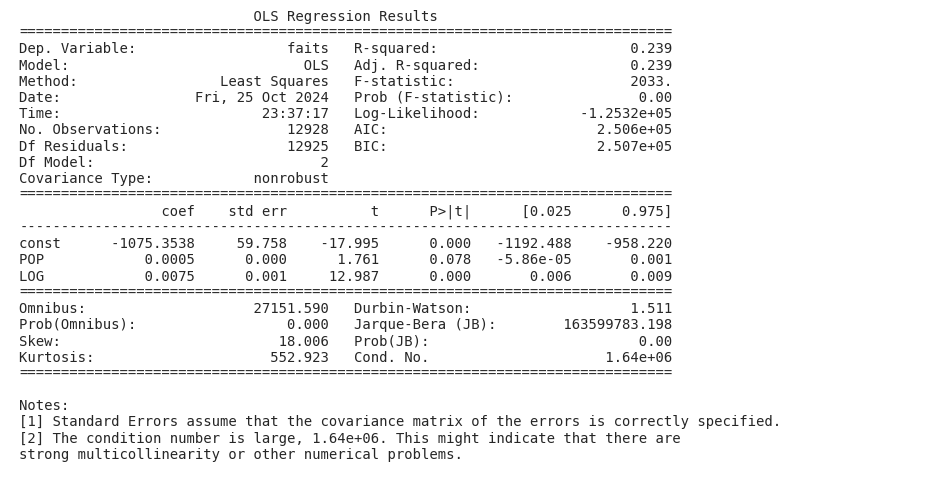

In [59]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming df is already defined and contains your data

# Variables indépendantes : population et logements
X = df[['POP', 'LOG']]

# Variable dépendante : taux de criminalité
y = df['faits']

# Ajouter une constante (intercept) à X
X = sm.add_constant(X)

# Créer et ajuster le modèle de régression multiple
model = sm.OLS(y, X).fit()

# Capture the summary text
summary_text = model.summary().as_text()

# Create a blank figure and add the summary as text
plt.figure(figsize=(12, 6))
plt.text(0.01, 0.05, summary_text, {'fontsize': 10}, fontproperties='monospace')
plt.axis('off')  # Hide axes
plt.savefig("regression_summary.png", dpi=300, bbox_inches="tight")
plt.show()


Les résultats du modèle présente un R² de 0.239, indiquant que 23.9 % de la variation des faits criminels est expliquée par ces deux variables. Cela montre que le modèle capture une partie de la relation entre les variables démographiques et la criminalité, mais une part importante de la variance reste inexpliquée.

Le modèle a estimé une constante de -1075.35, avec une p-value significative (p < 0.001). Dans notre cas une interprétation directe de la constante n'a pas de sens pratique dans ce contexte, car il est irréaliste d'avoir une population et des logements égaux à zéro. Elle est incluse pour ajuster le modèle global.

Le coefficient du nombre de logements (LOG) est de 0.0075 et est hautement significatif (p < 0.05). Cela signifie qu'une augmentation de 1000 logements est associée à environ 7.5 faits criminels supplémentaires, ce qui pourrait s'expliquer par une plus grande concentration de cibles potentielles pour des crimes comme les cambriolages. En revanche, bien que le coefficient de la population (POP) soit positif (0,0005), son effet n'est pas statistiquement significatif (p = 0.078), ce qui suggère que la population à elle seule n'a pas un impact déterminant sur la criminalité dans ce modèle.

Ce petit modèle a permis de mettre en évidence  que le nombre de logements semble avoir un effet direct et significatif sur le nombre de faits criminels enregistrés, et que l'impact de la population n'est pas clairement établi. Ce modèle explique une partie de la criminalité, mais il serait pertinent d'intégrer d'autres variables explicatives.

In [55]:
import statsmodels.api as sm
import pandas as pd

# Charger vos données dans un DataFrame
# data = pd.read_csv('votre_fichier.csv')

# Supposons que votre DataFrame s'appelle 'data'
X = df[['millPOP', 'millLOG', 'annee']]  # Variables explicatives continues
#X = pd.get_dummies(data[['Code.région']], drop_first=True)  # Variables catégorielles en indicatrices
X = sm.add_constant(X)  # Ajout d'une constante pour le modèle

y = df['faits']  # Variable dépendante

# Ajuster le modèle de régression
model = sm.OLS(y, X).fit()

# Résumé des résultats
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  faits   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4970
Date:                Fri, 25 Oct 2024   Prob (F-statistic):              0.608
Time:                        23:32:26   Log-Likelihood:            -1.2708e+05
No. Observations:               12928   AIC:                         2.542e+05
Df Residuals:                   12925   BIC:                         2.542e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.196e+04   1.18e+05     -0.611      0.5